In [63]:
import os
import glob
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring with the Lemmatizer

**Create Documents**

In [58]:
cats = ['sports', 'reading', 'politics_news', 'music', 'gaming', 'art', 'tech', 'science']
stem = 'lemma'

In [106]:
documents = []

for cat in cats:
    os.chdir(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\{cat}\Processed\{stem}')
    files = glob.glob('*.json')
    for file in files:
        with open(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\{cat}\Processed\{stem}\{file}', 'r') as f:
            comments = json.load(f)
        documents.append((' '.join([comment['comment'] for comment in comments]), cat, cat, file.split('.json')[0]))
        
documents = np.array(documents)

In [107]:
encoder = LabelEncoder()
documents[:, 2] = encoder.fit_transform(documents[:, 2])
documents[:, 2]

array(['6', '6', '6', '6', '4', '4', '4', '4', '4', '3', '3', '3', '3',
       '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '7', '7', '7', '7', '7', '5', '5', '5', '5', '5'],
      dtype='<U1716906')

In [108]:
encoder.inverse_transform(np.array(documents[:, 2], dtype=int))

array(['sports', 'sports', 'sports', 'sports', 'reading', 'reading',
       'reading', 'reading', 'reading', 'politics_news', 'politics_news',
       'politics_news', 'politics_news', 'music', 'music', 'music',
       'music', 'music', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming',
       'art', 'art', 'art', 'art', 'art', 'tech', 'tech', 'tech', 'tech',
       'tech', 'science', 'science', 'science', 'science', 'science'],
      dtype='<U1716906')

**Create Document Vectors**

We should explore using both the tfidf- and count-vectorizers; we should also look at different combinations of ngrams (let's use 1-grams, 1- and 2-grams, and 1- and 2- and 3-grams).

**TF-IDF Vectorizer**

Let's start by just looking at 1-grams:

In [62]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X = svd.fit_transform(X)

In [83]:
def get_label(i, colors, documents):
    if colors[documents[i][1]][1] == 0:
        colors[documents[i][1]][1] += 1
        return documents[i][1]
    else:
        return ""

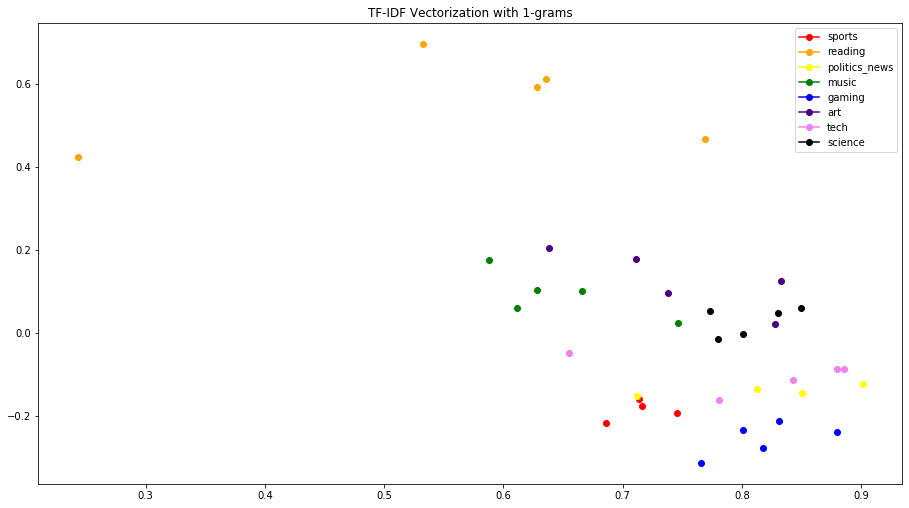

In [88]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('TF-IDF Vectorization with 1-grams')
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\tf_idf\{stem}\1_gram.png')

And now for 1- and 2-grams:

In [89]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2))
X = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X = svd.fit_transform(X)

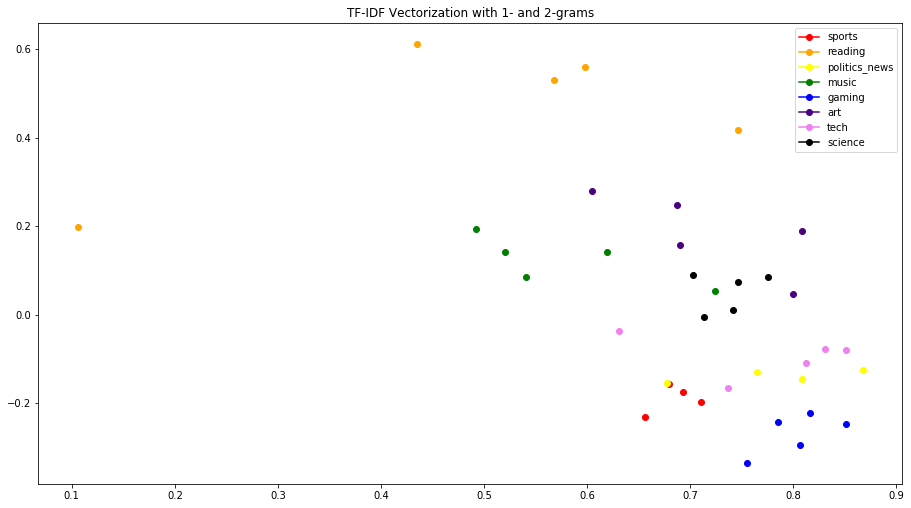

In [90]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('TF-IDF Vectorization with 1- and 2-grams')
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\tf_idf\{stem}\1_2_gram.png')

And now finally with 1-, 2-, and 3-grams:

In [91]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
X = tfidf_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X = svd.fit_transform(X)

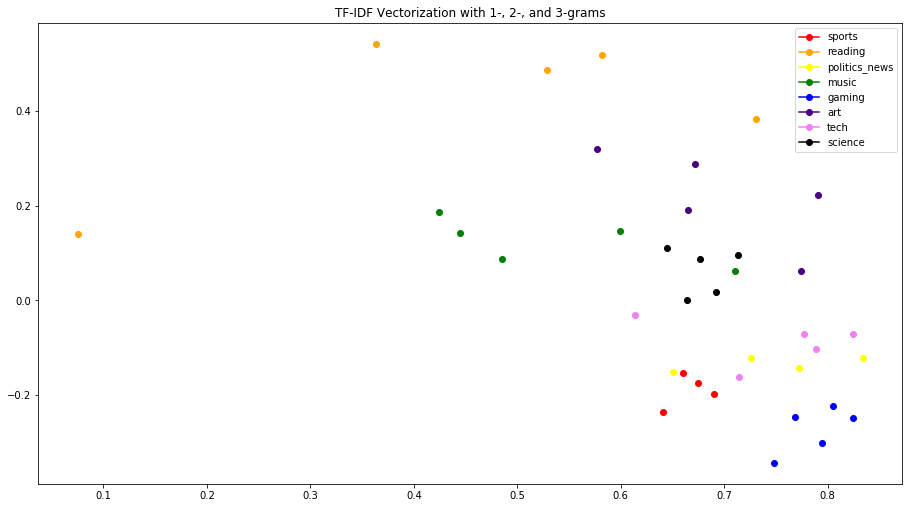

In [92]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('TF-IDF Vectorization with 1-, 2-, and 3-grams')
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\tf_idf\{stem}\1_2_3_gram.png')

**Count Vectorizer**

In [98]:
count_vectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1))
X = count_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X = svd.fit_transform(X)

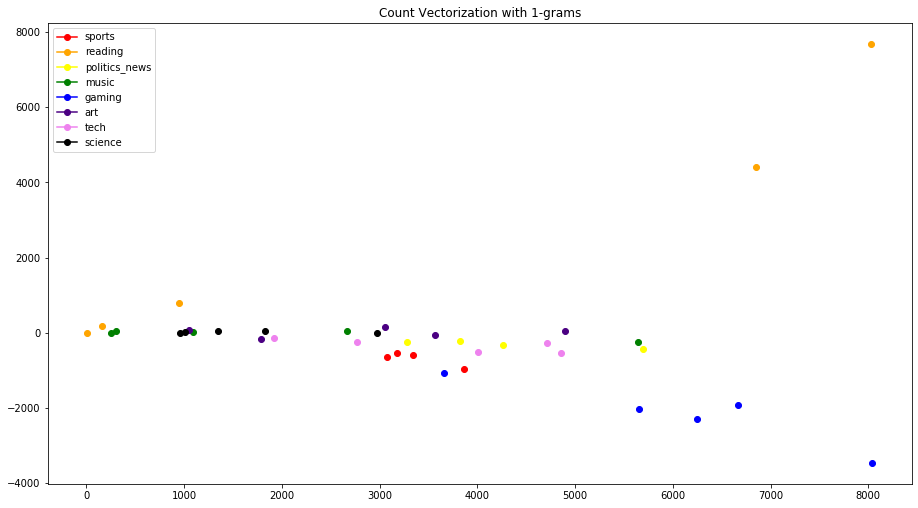

In [99]:
colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('Count Vectorization with 1-grams')
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\count\{stem}\1_gram.png')

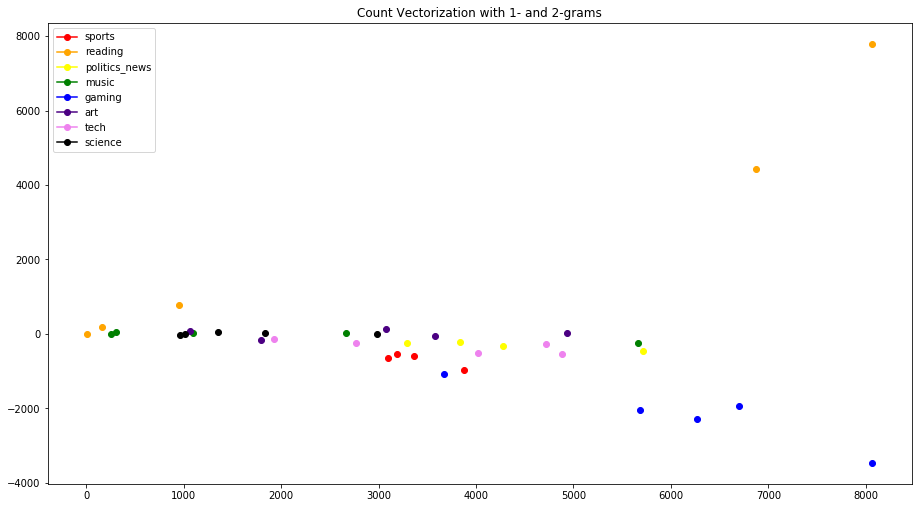

In [101]:
count_vectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2))
X = count_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X = svd.fit_transform(X)

colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('Count Vectorization with 1- and 2-grams')
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\count\{stem}\1_2_gram.png')

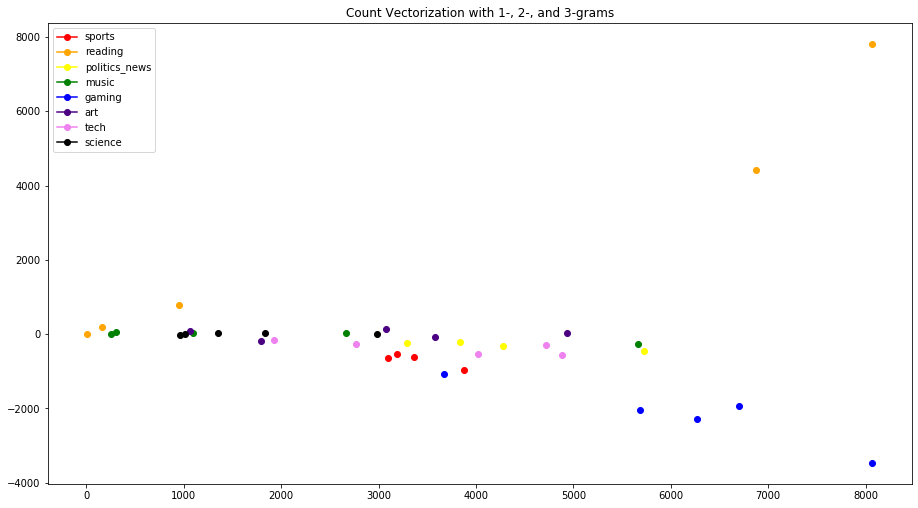

In [102]:
count_vectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
X = count_vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()

X = svd.fit_transform(X)

colors = {'sports': ['red', 0], 'reading': ['orange', 0], 'politics_news': ['yellow', 0], 'music': ['green', 0], 'gaming': ['blue', 0], 'art': ['indigo', 0], 'tech': ['violet', 0], 'science': ['black', 0]}

fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][1]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()
ax.set_title('Count Vectorization with 1-, 2-, and 3-grams')
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\count\{stem}\1_2_3_gram.png')

## Word Clouds

In [103]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**The art subreddits:**

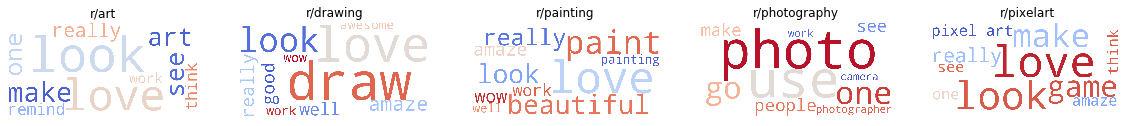

In [117]:
art_subs = documents[documents[:, 1] == 'art']

fig, ax = plt.subplots(ncols=len(art_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(art_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{art_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\art.png')

**The gaming subreddits:**

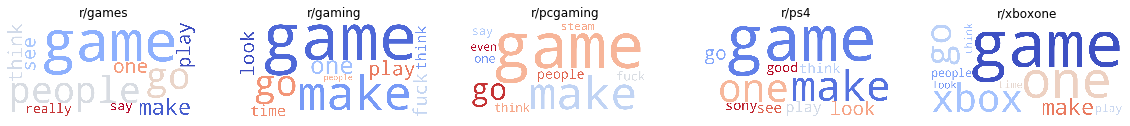

In [118]:
gaming_subs = documents[documents[:, 1] == 'gaming']

fig, ax = plt.subplots(ncols=len(gaming_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(gaming_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{gaming_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\gaming.png')

**The music subreddits:**

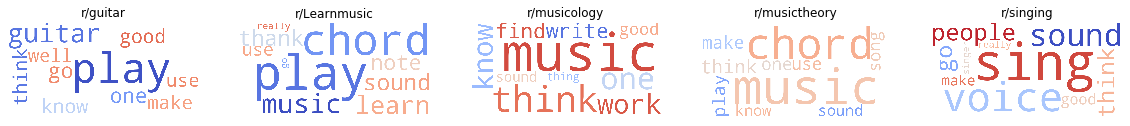

In [119]:
music_subs = documents[documents[:, 1] == 'music']

fig, ax = plt.subplots(ncols=len(music_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(music_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{music_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\music.png')

**The politics/news subreddits:**

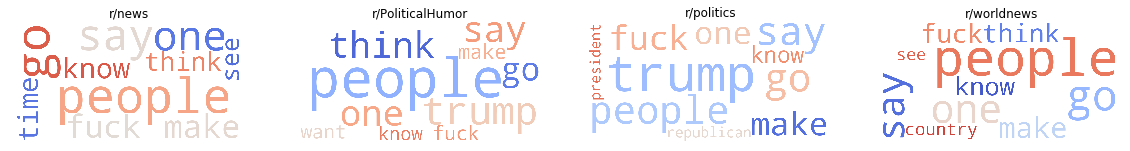

In [120]:
politics_news_subs = documents[documents[:, 1] == 'politics_news']

fig, ax = plt.subplots(ncols=len(politics_news_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(politics_news_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{politics_news_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\politics_news.png')

**The Reading subreddits:**

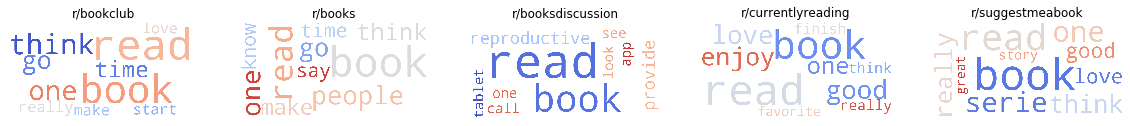

In [121]:
reading_subs = documents[documents[:, 1] == 'reading']

fig, ax = plt.subplots(ncols=len(reading_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(reading_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{reading_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\reading.png')

**The sports subreddits**:

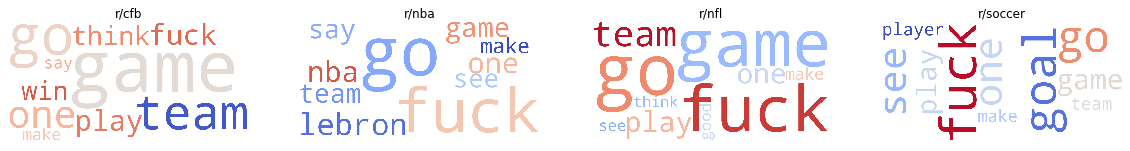

In [122]:
sports_subs = documents[documents[:, 1] == 'sports']

fig, ax = plt.subplots(ncols=len(sports_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(sports_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{sports_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\sports.png')

**The science subreddits:**

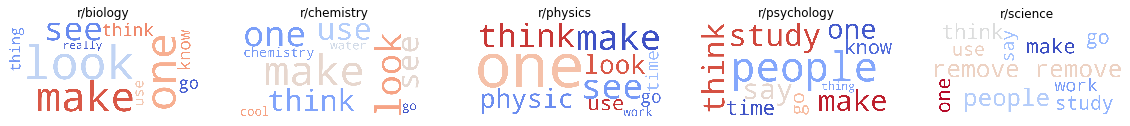

In [123]:
science_subs = documents[documents[:, 1] == 'science']

fig, ax = plt.subplots(ncols=len(science_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(science_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{science_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\science.png')

**The tech subreddits**

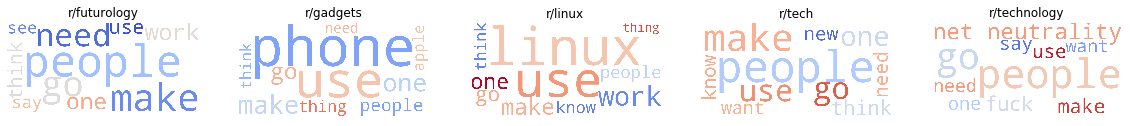

In [124]:
tech_subs = documents[documents[:, 1] == 'tech']

fig, ax = plt.subplots(ncols=len(tech_subs), figsize=[20, 20])

for i, axis in enumerate(ax):
    wordcloud = WordCloud(max_words=10, background_color='white', width=1000, height=500, colormap='coolwarm').generate(tech_subs[i][0])
    axis.imshow(wordcloud)
    axis.axis("off")
    axis.set_title(f'r/{tech_subs[i][3]}')
    
plt.savefig(fr'C:\Users\jonat\Desktop\Data Mining\Project\Images\word_clouds\tech.png')

**You can use the script generate_visualizations.py to create all combinations of n-grams and stemming, as well as word clouds.**